In [4]:
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import freud
import time
from nematic_order import nematic_order

In [35]:
traj = gsd.hoomd.open('/mnt/d/Job/SIC/Test/slab-tensile.gsd')
nematic = freud.order.Nematic()

In [3]:
def nop(frame):
    # Get the positional data of all atoms
    positions = frame.particles.position
    # Get the number of molecules
    molecule_ids = frame.bonds.group
    # Assigning the first atoms position to temp variable
    temp = positions[0]
    # Initialize list of vectors
    vectors = []
    posits = []
    # Loop through all atoms with counter i
    for i, pos in enumerate(positions):
        # Check to see if all atoms have been counted
        if i < len(molecule_ids):
            # Addding the vector difference between current and previous atom positions
            # np.stack allows for them to be treated as arrays
            vectors.append(np.stack(pos) - np.stack(temp))
            # Updating temp variable for the next cycle
            temp = pos
            # posits.append[np.stack(pos)]
    # Converting the list into an array, ignoring the first one
    vectors = np.array(vectors[1:])
    return vectors

In [4]:
# METHOD 1
# Starting timer to see how long this process takes
start = time.process_time()
orders = []
frames = []
directors = []
count = 0
# Iterate through every frame in the trajectory
for frame in traj:
    # Appending the count to assign the frame a number
    count += 1
    frames.append(count)
    # Computing the S2 order parameter based off of the nop function of the frame
    nematic.compute(nop(frame))
    # Appending the order of the frame for plotting purposes
    orders.append(nematic.order)
    directors.append(nematic.director)
print("Time taken:", time.process_time() - start, "s")

Time taken: 26.5338294 s


/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Text(0.5, 1.0, 'Method 1')

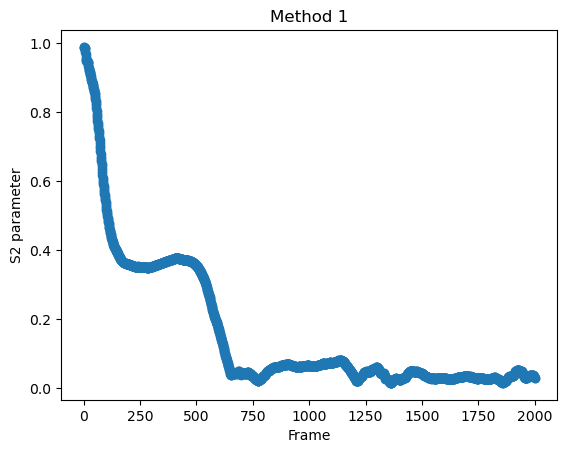

In [5]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")
plt.title("Method 1")

In [32]:
def nop(frame):
    # Get the positional data of all atoms
    positions = frame.particles.position
    # Get the number of molecules
    molecule_ids = frame.bonds.group
    # Assigning the first atoms position to temp variable
    temp = positions[0]
    # Initialize list of vectors
    vectors = []
    posits = []
    # Loop through all atoms with counter i
    for i, pos in enumerate(positions):
        # Check to see if all atoms have been counted
        if i < len(molecule_ids):
            # Addding the vector difference between current and previous atom positions
            # np.stack allows for them to be treated as arrays
            vectors.append(np.stack(pos) - np.stack(temp))
            # Updating temp variable for the next cycle
            temp = pos
            posits.append(pos)
    # Converting the list into an array, ignoring the first one
    vectors = np.array(vectors[1:])
    return vectors, posits

In [36]:
lattice_orders,director = nematic_order("/mnt/d/Job/SIC/Test/slab-tensile.gsd")

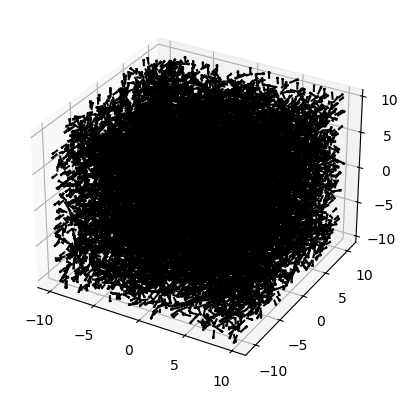

In [37]:
# Plotting the director 
box = traj[1].configuration.box
posit = []
orientations, posit = nop(traj[1])
posit = np.array(posit[1:])
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    posit[:, 0],
    posit[:, 1],
    posit[:, 2],
    orientations[:, 0],
    orientations[:, 1],
    orientations[:, 2],
    normalize=True,
    color="black",)


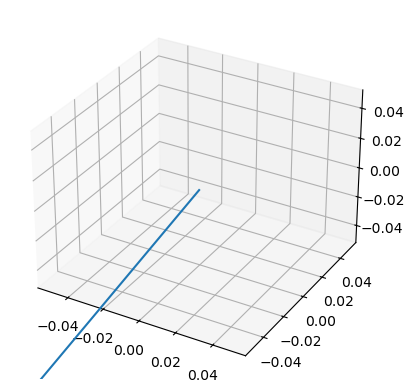

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
director = np.array(director)
ax.quiver(0,0,0,(director[:1,0]),(director[:1,1]),(director[:1,2]))

In [2]:
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import freud
import time
from nematic_order import nematic_order
from nematic_order import graph_bonds

/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/mdtraj/formats/__init__.py:13: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from mdtraj.formats.trr import TRRTrajectoryFile


In [3]:
frames = graph_bonds("/home/jbieri/CME_lab/projects/SIC/preliminary-work/pps/coarse-graining/pps-melt-cg.gsd")

In [59]:
frame = frames[569]
positions = []
vectors = []
for i in range(len(frame)):
    vectors.append(frame[i][0][1])
    positions.append(frame[i][0][0])

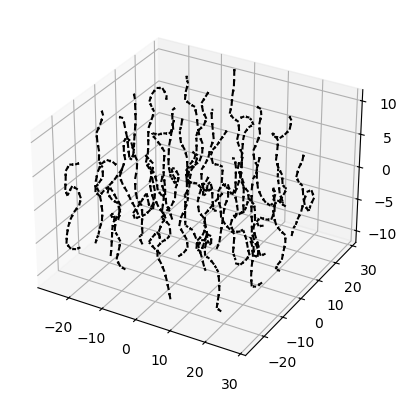

In [60]:
# Plotting the director 
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i in range(len(positions)):
    ax.quiver3D(
        positions[i][0],
        positions[i][1],
        positions[i][2],
        vectors[i][0],
        vectors[i][1],
        vectors[i][2],
        normalize=True,
        color="black",)

In [58]:
# Plotting the director 
# box = traj[1].configuration.box
vecs = np.array(vecs)
poses = np.array(poses)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.quiver3D(
    frames[0, 0],
    frames[0, 1],
    frames[0, 2],
    frames[0, 3],
    frames[0, 4],
    frames[0, 5],
    normalize=True,
    color="black",)

NameError: name 'vecs' is not defined